In [1]:
import tensorflow as tf

(X_train,y_train),(X_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()
# X_train[0],y_train[0],X_test[0],y_test[0]


In [2]:
X_train.shape

(60000, 28, 28)

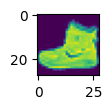

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(0.8,0.8))
plt.imshow(X_train[0])

In [4]:
dic={0: 'T-shirt/top',
1: 'Trouser',
2: 'Pullover',
3: 'Dress',
4: 'Coat',
5: 'Sandal',
6: 'Shirt',
7: 'Sneaker',
8: 'Bag',
9: 'Ankle boot'}

In [5]:
dic[y_test[0]]

'Ankle boot'

In [6]:
X_test[0].shape

(28, 28)

In [7]:
y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

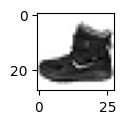

In [8]:
plt.figure(figsize=(1,1))
plt.imshow(X_train[0],cmap=plt.cm.binary)
plt.show()

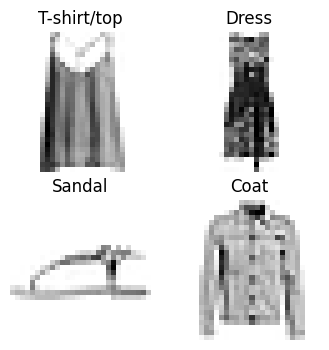

In [9]:
import random
plt.figure(figsize=(4,4))
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    rand_ind=random.choice(range(len(X_train)))
    plt.imshow(X_train[rand_ind],cmap=plt.cm.binary)
    plt.title(dic[y_train[rand_ind]])
    plt.axis(False)

In [10]:
tf.one_hot(y_test[:10],depth=10).shape

TensorShape([10, 10])

In [11]:
# if your labels are one-hot encoding, use CategoricalCrossentropy()
# otherwise use SparseCrossentropy()
# Output layer activation:- softmax(not sigmoid)

In [12]:
tf.random.set_seed(42)
model_11=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

# compile the model
model_11.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# fit the model
non_norm_history=model_11.fit(
    X_train,
    # tf.one_hot(y_train,depth=10),
    y_train,
    epochs=10,
    validation_data=(X_test,y_test)
    # validation_data=(X_test,tf.one_hot(y_test,depth=10))
                     )

Epoch 1/10


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.0989 - loss: 2.3039 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0973 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0973 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0973 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0973 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0973 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0973 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0973 - loss: 2.3028 - val_accurac

In [13]:
y_pred=model_11.predict(X_test)
y_pred_labels=[]
for i in y_pred:
    y_pred_labels.append(tf.argmax(i))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [14]:
import numpy as np
np.array(y_pred_labels)

array([6, 6, 6, ..., 6, 6, 6], dtype=int64)

In [15]:
model_11.evaluate(X_train,y_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1000 - loss: 2.3027


[2.3026530742645264, 0.10000000149011612]

In [16]:
model_11.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [17]:
X_train_norm=X_train/255.0
X_test_norm=X_test/255
X_train_norm.min(),X_train_norm.max()

(0.0, 1.0)

In [18]:
tf.random.set_seed(42)
model_12=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model_12.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

norm_history=model_12.fit(X_train_norm,y_train,epochs=10,
                          validation_data=(X_test_norm,y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4065 - loss: 1.4696 - val_accuracy: 0.5011 - val_loss: 1.2414
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5334 - loss: 1.1332 - val_accuracy: 0.5741 - val_loss: 1.0531
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6032 - loss: 0.9552 - val_accuracy: 0.6191 - val_loss: 0.9279
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6606 - loss: 0.8495 - val_accuracy: 0.6735 - val_loss: 0.8388
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6917 - loss: 0.7789 - val_accuracy: 0.6867 - val_loss: 0.7945
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7040 - loss: 0.7442 - val_accuracy: 0.6951 - val_loss: 0.7707
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7147 - loss: 0.7217 - val_accuracy: 0.7117 - val_loss: 0.7510
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7547 - loss: 0.6800 - 

<Axes: >

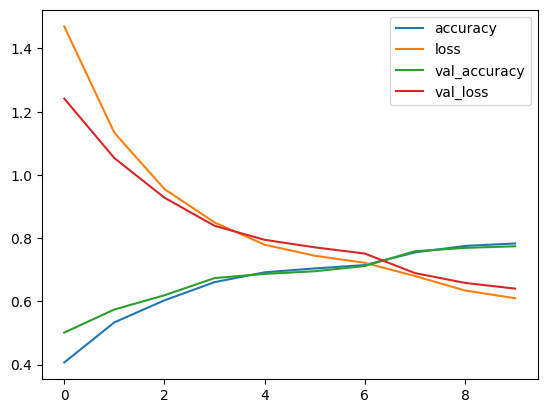

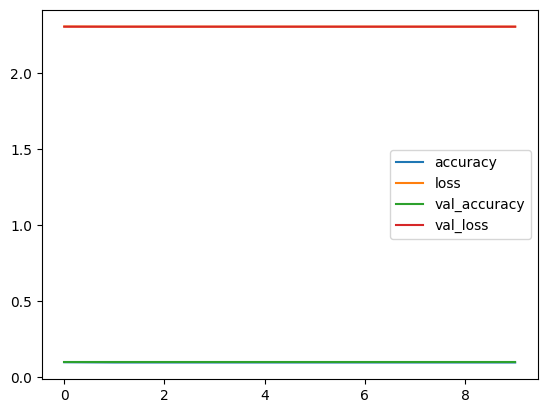

In [19]:
import pandas as pd
pd.DataFrame(norm_history.history).plot()
pd.DataFrame(non_norm_history.history).plot()

In [27]:
tf.random.set_seed(42)
#  Create model
model_13=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model_13.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

lr_schedular=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))
history1=model_13.fit(
    X_train_norm,
    y_train,
    epochs=20,
    validation_data=(X_test_norm,y_test),
    callbacks=[lr_schedular]
                      )




Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3827 - loss: 1.5123 - val_accuracy: 0.5152 - val_loss: 1.1780 - learning_rate: 0.0010
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5592 - loss: 1.0645 - val_accuracy: 0.6490 - val_loss: 1.0000 - learning_rate: 0.0011
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6743 - loss: 0.9133 - val_accuracy: 0.6930 - val_loss: 0.8754 - learning_rate: 0.0013
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6944 - loss: 0.8319 - val_accuracy: 0.7106 - val_loss: 0.8216 - learning_rate: 0.0014
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7096 - loss: 0.7872 - val_accuracy: 0.7230 - val_loss: 0.7913 - learning_rate: 0.0016
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7249 - loss: 0.7576 - val_accuracy: 0.7251 - val_loss: 0.7759 - learning_rate: 0.0018
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7338 - l

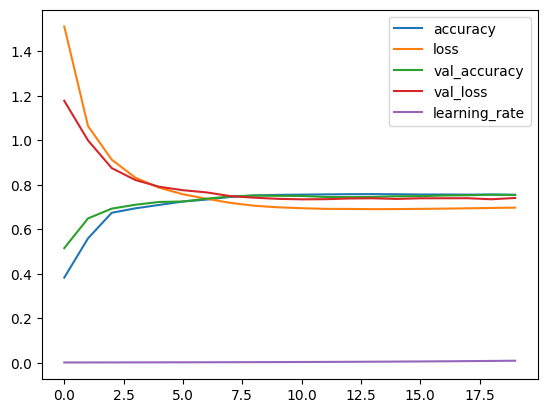

In [28]:
pd.DataFrame(history1.history).plot();

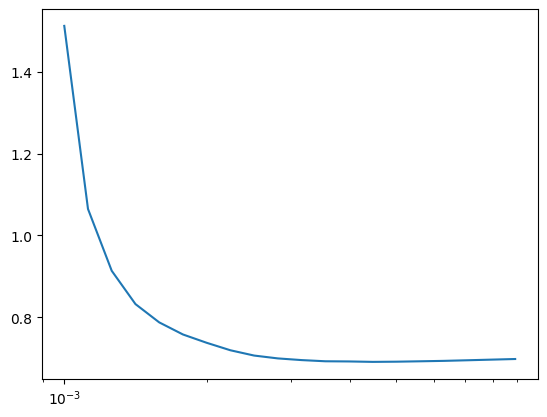

In [30]:
lrs=1e-3*(10**(tf.range(20)/20))
plt.semilogx(lrs,history1.history['loss'])
plt.show()

In [31]:
model_13.layers

[<Flatten name=flatten_4, built=True>,
 <Dense name=dense_12, built=True>,
 <Dense name=dense_13, built=True>,
 <Dense name=dense_14, built=True>]

In [32]:
weights, biases = model_13.layers[1].get_weights()

In [33]:
weights,weights.shape

(array([[ 1.9409043 ,  0.06685027, -1.3167974 ,  2.6702883 ],
        [ 2.5945325 , -0.04825423, -5.1229877 , -1.1735281 ],
        [-0.39884844,  0.0797261 , -0.52468264, -3.0889747 ],
        ...,
        [-0.11289161, -0.11944863, -1.3223572 , -1.6422806 ],
        [ 1.5061369 , -0.07558374, -1.4518418 ,  0.60062474],
        [ 2.2628748 , -0.07634684,  0.33177757, -0.17372149]],
       dtype=float32),
 (784, 4))

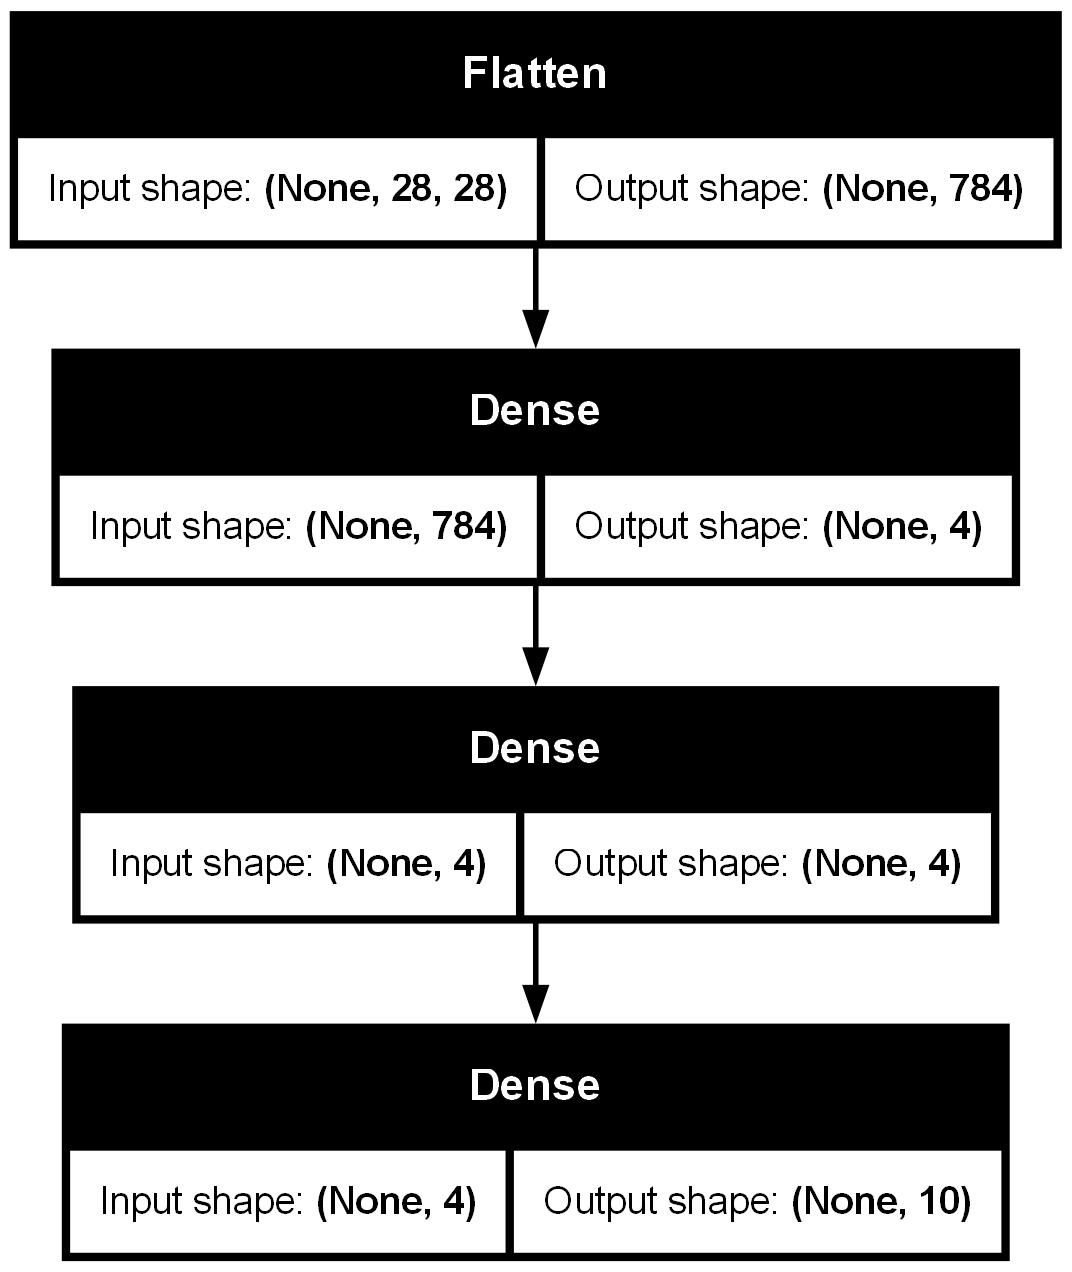

In [35]:
# Every neuron has a bias vector. Each of these is paired with a weights matrix.
# the bias vector get initialized as zeros(at least in the case of a tensorflow
# Dense layer)
# the bias vector dictates how much the patterns within the corresponding weights should influence the next layer
from tensorflow.keras.utils import plot_model
plot_model(model=model_13,show_shapes=True)
